In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import cv2 
from tqdm import tqdm
from glob import glob
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model


In [6]:
train_path = "C:/Users/mr/Downloads/DATASET/DATASET/TRAIN"
test_path = "C:/Users/mr/Downloads/DATASET/DATASET/TEST"

In [7]:
#visualization
from cv2 import cvtColor
x_data = [] 
y_data = [] 
for category in glob(train_path+'/*'): 
    for file in tqdm(glob(category+'/*')): 
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split('/')[-1]) 
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████████████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:42<00:00, 236.04it/s]


In [8]:
data.shape

(22564, 2)

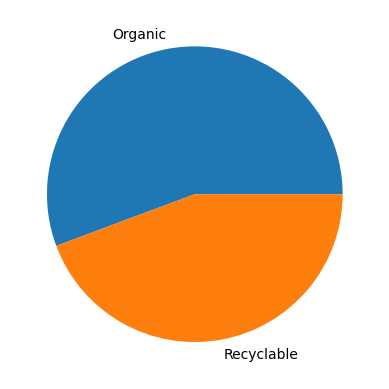

In [9]:
colors = ['#a0d157', '#c48bb8'] 
plt.pie(data.label.value_counts(), labels = ['Organic','Recyclable'])
plt.show()

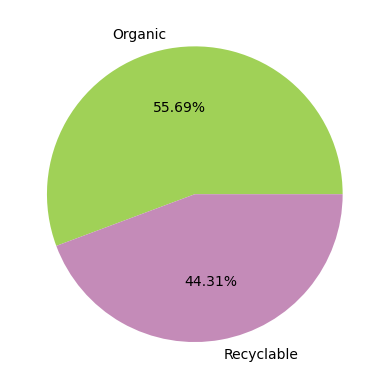

In [10]:
colors = ['#a0d157', '#c48bb8'] 
plt.pie(data.label.value_counts(), labels = ['Organic','Recyclable'], autopct='%0.2f%%', colors = colors)
plt.show()

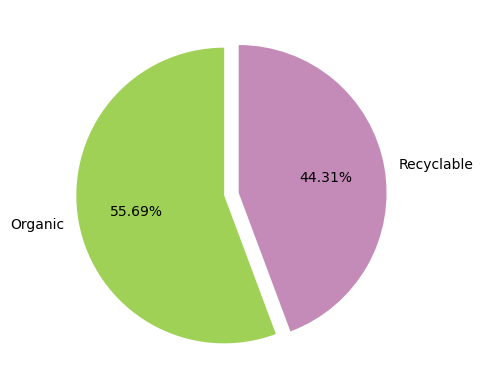

In [11]:
colors = ['#a0d157', '#c48bb8'] 
plt.pie(data.label.value_counts(), labels = ['Organic','Recyclable'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()

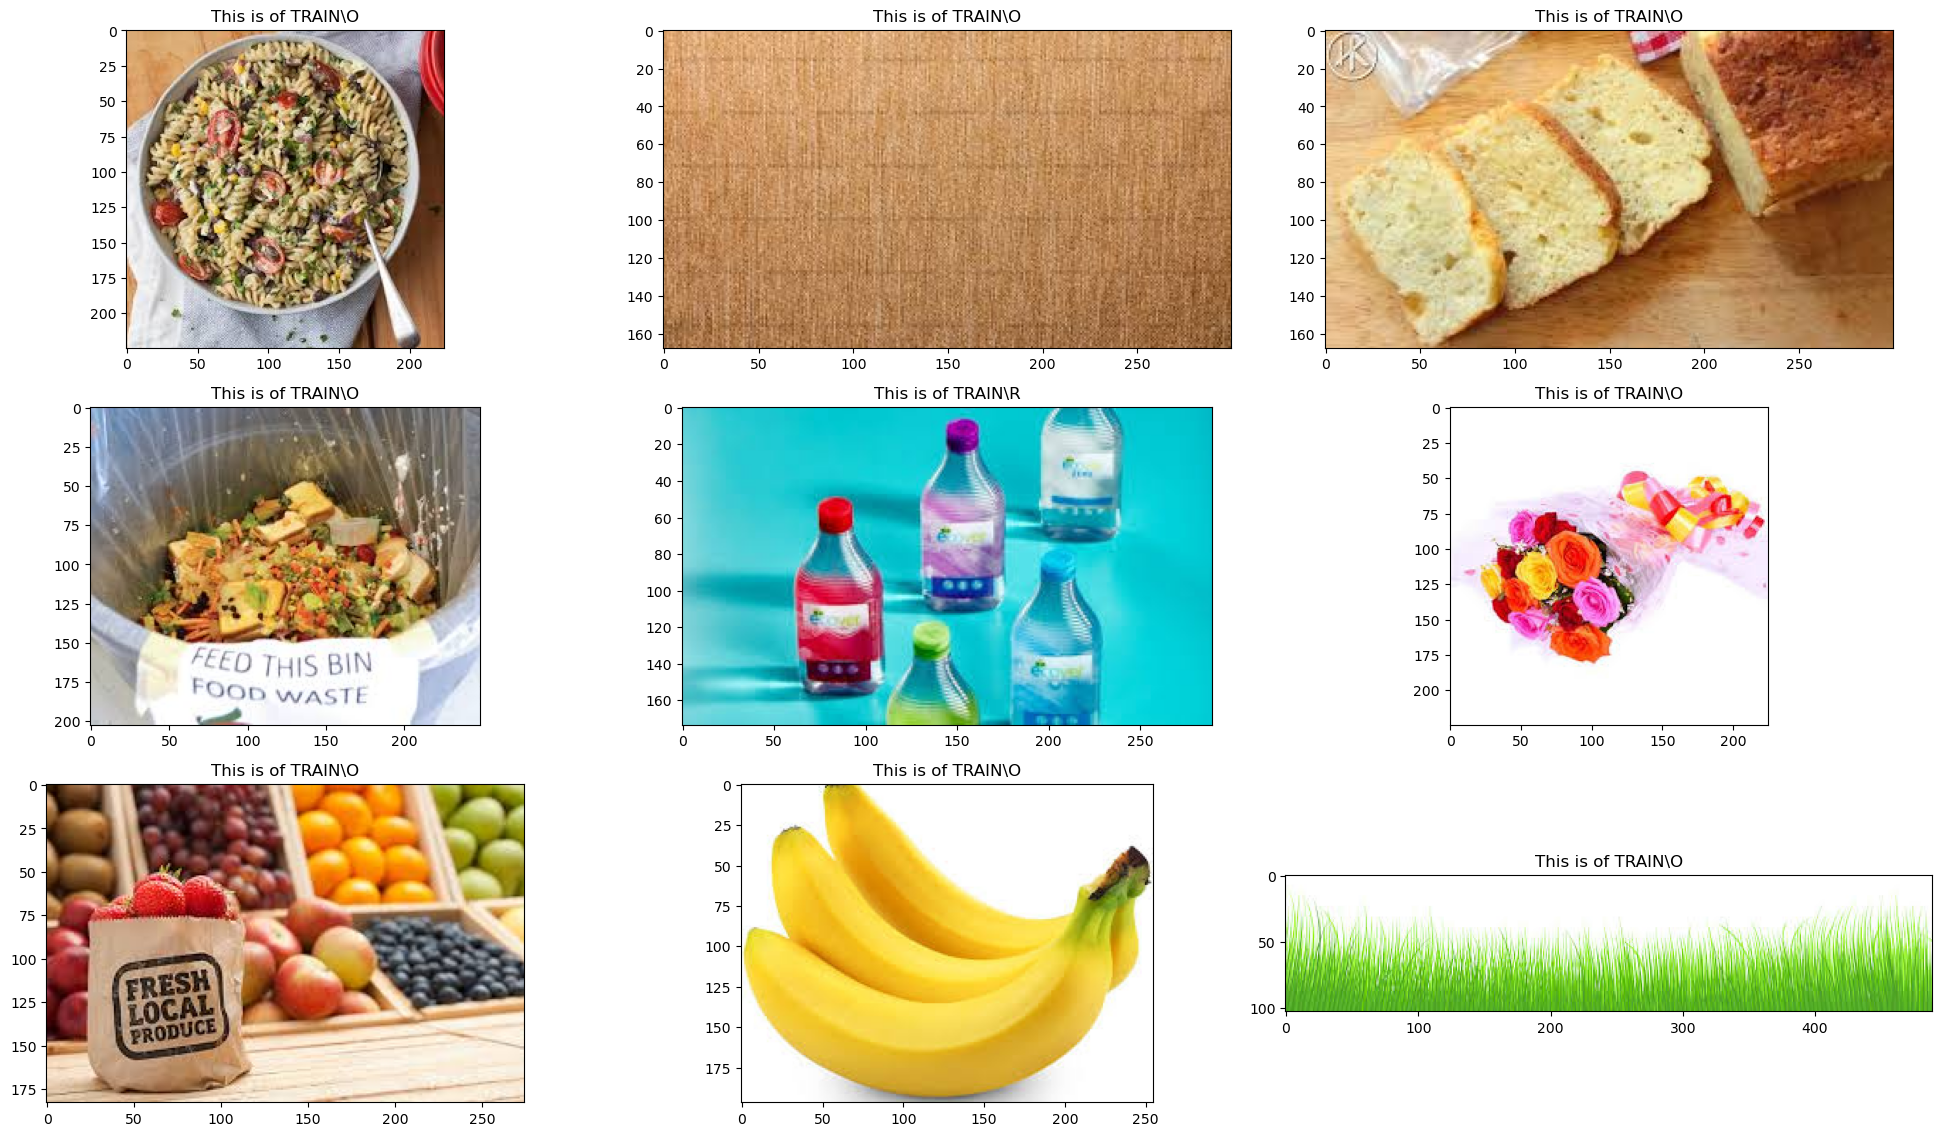

In [12]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256



In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [33]:
hist = model.fit(
    train_generator,  
    epochs=10,  
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 929s 10s/step - accuracy: 0.6811 - loss: 0.6727 - val_accuracy: 0.8743 - val_loss: 0.3501
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 860s 10s/step - accuracy: 0.8282 - loss: 0.4169 - val_accuracy: 0.8388 - val_loss: 0.3659
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 921s 10s/step - accuracy: 0.8464 - loss: 0.3789 - val_accuracy: 0.8822 - val_loss: 0.2934
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 849s 10s/step - accuracy: 0.8597 - loss: 0.3497 - val_accuracy: 0.8930 - val_loss: 0.2810
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 854s 10s/step - accuracy: 0.8837 - loss: 0.3080 - val_accuracy: 0.8691 - val_loss: 0.3293
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 840s 9s/step - accuracy: 0.8835 - loss: 0.2972 - val_accuracy: 0.8747 - val_loss: 0.2999
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 770s 9s/step - accuracy: 0.8983 - loss: 0.2618 - val_accuracy: 0.8703 - val_loss: 0.3278
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 638s 7s/step - accuracy: 0.9034 - loss: 0.2494 - val_accuracy: 0.884